___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Natural Language Processing Project


Trong dự án NLP này, bạn sẽ cố gắng phân loại Đánh giá Yelp thành các loại 1 sao hoặc 5 sao dựa trên nội dung văn bản trong các bài đánh giá. Đây sẽ là một thủ tục đơn giản hơn so với bài giảng, vì chúng ta sẽ sử dụng các phương thức đường ống cho các tác vụ phức tạp hơn.

Chúng tôi sẽ sử dụng [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Mỗi quan sát trong tập dữ liệu này là một đánh giá về một doanh nghiệp cụ thể của một người dùng cụ thể.

Cột "sao" là số sao (từ 1 đến 5) được người đánh giá ấn định cho doanh nghiệp. (Sao càng cao thì càng tốt.) Nói cách khác, đó là đánh giá về doanh nghiệp của người viết bài đánh giá.

Cột "cool" là số votes "cool" mà đánh giá này nhận được từ những người dùng Yelp khác.

Tất cả các bài đánh giá đều bắt đầu với 0 phiếu bầu "cool" và không có giới hạn về số vote "cool" mà một bài đánh giá có thể nhận được. Nói cách khác, đó là đánh giá của chính bài đánh giá, không phải là đánh giá của doanh nghiệp.

Cột "useful" và "funny" tương tự như cột "cool".

Bắt đầu nào! Chỉ cần làm theo hướng dẫn bên dưới!

## Imports
 **Import the usual suspects. :) **

In [1]:
import numpy as np
import pandas as pd

## The Data

**Đọc tệp yelp.csv và đặt nó làm dataframe được gọi là yelp.**

In [2]:
yelp = pd.read_csv('yelp.csv')

** Kiểm tra phần đầu, thông tin và mô tả các phương pháp trên yelp. **

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Tạo một cột mới có tên "text length"(độ dài văn bản), là số từ trong cột văn bản. **

In [6]:
yelp['text length'] = yelp['text'].apply(len)

# EDA - Exploratory Data Analysis- Phân tích dữ liệu khám khá

Hãy cùng khám phá dữ liệu

## Imports

**Nhập thư viện trực quan hóa dữ liệu nếu bạn chưa làm như vậy. **

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

**Sử dụng FacetGrid từ thư viện seaborn để tạo một lưới gồm 5 biểu đồ độ dài văn bản dựa trên xếp hạng sao. Tham khảo tài liệu về seaborn để biết gợi ý về điều này**

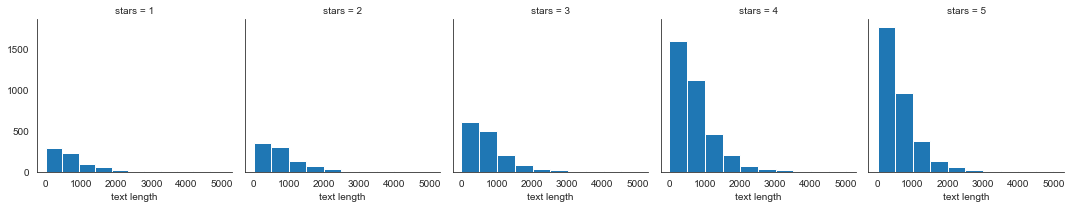

In [8]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length')

**Tạo một boxplot của độ dài văn bản cho mỗi danh mục sao.**

<AxesSubplot:xlabel='stars', ylabel='text length'>

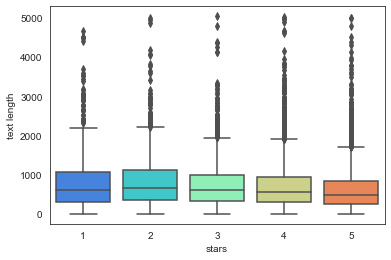

In [9]:
sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow')

**Tạo bảng đếm (countplot) số lần xuất hiện cho từng loại xếp hạng theo sao(for each type of star rating).**

<AxesSubplot:xlabel='stars', ylabel='count'>

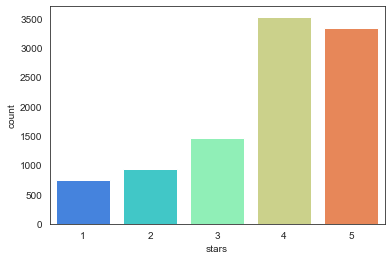

In [10]:
sns.countplot(x='stars',data=yelp,palette='rainbow')

** Sử dụng groupby để lấy giá trị trung bình của các cột số, bạn sẽ có thể tạo khung dữ liệu(dataframe) này bằng thao tác: **

In [11]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,830.244326
2,0.719525,1.563107,0.875944,846.249191
3,0.788501,1.306639,0.694730,762.325120
4,0.954623,1.395916,0.670448,716.493193
5,0.944261,1.381780,0.608631,627.976925


**Sử dụng corr() trên khung dữ liệu theo nhóm đó để tạo khung dữ liệu này(on that groupby dataframe to produce this dataframe):**

In [12]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.856995
useful,-0.743329,1.000000,0.894506,0.698743
funny,-0.944939,0.894506,1.000000,0.842585
text length,-0.856995,0.698743,0.842585,1.000000


**Sau đó, sử dụng seaborn để tạo bản đồ nhiệt dựa trên khung dữ liệu .corr() đó:**

<AxesSubplot:>

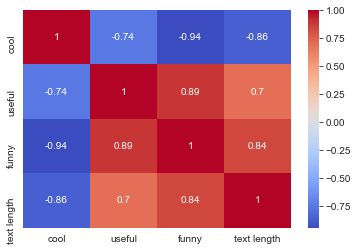

In [13]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

## NLP Classification Task

Hãy chuyển sang nhiệm vụ thực tế. Để làm cho mọi thứ dễ dàng hơn một chút, hãy tiếp tục và chỉ lấy các bài đánh giá 1 sao hoặc 5 sao.

**Tạo khung dữ liệu có tên yelp_class chứa các cột của khung dữ liệu yelp nhưng chỉ dành cho các bài đánh giá 1 hoặc 5 sao. **

In [14]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

**Tạo hai đối tượng X và y. X sẽ là cột 'text' của yelp_class và y sẽ là cột 'star' của yelp_class. (Các features and target/labels của bạn)**

In [15]:
X = yelp_class['text']
y = yelp_class['stars']

**Import CountVectorizer và tạo một đối tượng CountVectorizer. **

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

**Sử dụng phương thức fit_transform trên đối tượng CountVectorizer và pass in X (cột the 'text'). Lưu kết quả này bằng cách ghi đè X.**

In [17]:
X = cv.fit_transform(X)

## Train Test Split

Hãy chia dữ liệu của chúng tôi thành dữ liệu đào tạo và thử nghiệm.

** Sử dụng train_test_split để chia nhỏ dữ liệu thành X_train, X_test, y_train, y_test. Sử dụng test_size = 0.3 và random_state = 101 **

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

## Training a Model

Đã đến lúc đào tạo model!

** Import MultinomialNB và tạo một phiên bản của công cụ ước tính (an instance of the estimator) và gọi là nb **

In [20]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Bây giờ fit nb bằng cách sử dụng dữ liệu đào tạo(training data).**

In [21]:
nb.fit(X_train,y_train)

MultinomialNB()

## Predictions and Evaluations

Đã đến lúc để xem mô hình của chúng ta đã làm như thế nào!

**Sử dụng phương pháp dự đoán của nb để dự đoán các nhãn từ X_test.**

In [22]:
predictions = nb.predict(X_test)

** Tạo ma trận nhầm lẫn và báo cáo phân loại bằng cách sử dụng các dự đoán này và y_test **

In [23]:
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



**Tuyệt vời! Hãy xem điều gì sẽ xảy ra nếu chúng tôi cố gắng đưa TF-IDF vào quy trình này bằng cách sử dụng một pipeline (đường dẫn).**

# đến đây là đọc thêm thôi
# Using Text Processing

** Import TfidfTransformer from sklearn. **

In [25]:
from sklearn.feature_extraction.text import  TfidfTransformer

** Import Pipeline from sklearn. **

In [26]:
from sklearn.pipeline import Pipeline

**Bây giờ, hãy tạo một pipeline (đường dẫn) với các bước sau: CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [27]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts (chuỗi để đếm số nguyên token)
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores(số nguyên cho điểm TF-IDF có trọng số)
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier(đào tạo trên vectơ TF-IDF 
                                                                                      #với bộ phân loại Naive Bayes)
])

## Using the Pipeline

**Đã đến lúc sử dụng pipeline (đường ống)! Hãy nhớ rằng pipeline(đường dẫn) này đã có tất cả các bước tiền xử lý của bạn trong đó, nghĩa là chúng tôi sẽ cần chia lại dữ liệu gốc (Hãy nhớ rằng chúng tôi đã ghi đè X thành phiên bản CountVectorized. Những gì chúng tôi cần chỉ là văn bản **

### Train Test Split

**Redo the train test split on the yelp_class object.(Làm lại quá trình train dữ liệu test trên đối tượng yelp_class).**

In [28]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

**Bây giờ phù hợp với pipeline (đường ống) dẫn đến dữ liệu training. Hãy nhớ rằng bạn không thể sử dụng cùng một dữ liệu training như lần trước vì dữ liệu đó đã được vector hóa. Chúng ta chỉ cần chuyển văn bản và nhãn**

In [29]:
# May take some time
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

### Predictions and Evaluation

**Bây giờ sử dụng pipeline (đường ống) để dự đoán từ X_test và tạo báo cáo phân loại và ma trận nhầm lẫn. Bạn sẽ nhận thấy kết quả kỳ lạ.**

In [30]:
predictions = pipeline.predict(X_test)

In [31]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  0 228]
 [  0 998]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Có vẻ như Tf-Idf đã thực sự làm mọi thứ trở nên tồi tệ hơn! Đó là nó cho dự án này. Nhưng vẫn còn rất nhiều thứ khác mà bạn có thể thử:

**Một số thứ khác để thử ....**
Hãy thử quay lại và xem lại các bước của quy trình và xem liệu việc tạo một bộ phân tích tùy chỉnh như chúng ta đã làm trong bài giảng có giúp ích gì không (lưu ý: có thể sẽ không). Hoặc tạo lại pipeline (đường ống) chỉ với CountVectorizer () và NaiveBayes. Việc thay đổi mô hình ML ở cuối thành một trình phân loại khác có giúp ích gì không?

# Great Job!